In [12]:
import pandas as pd
import numpy as np
import sys
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from matplotlib import pyplot as plt
np.set_printoptions(linewidth=200)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [13]:
data = pd.read_csv('C:\\Users\\ayyy\\ipython\\loan_data.csv',sep=',',header=0)

In [14]:
#1.1.1
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [15]:
#1.1.2
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9.577000e+03,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000
mean,0.805054,0.122638,319.033619,10.932082,12.606295,710.844106,4560.748482,1.691177e+04,46.798171,1.577007,0.163726,0.062128,0.159967
std,0.396180,0.026848,207.010102,0.614835,6.884227,37.971904,2497.060076,3.375727e+04,29.015745,2.199896,0.546241,0.262139,0.366594
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.210000,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928238,12.660000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.350000,11.291780,17.950000,737.000000,5730.000000,1.824200e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [16]:
#1.1.3
data['credit.policy'].describe()

count    9577.000000
mean        0.805054
std         0.396180
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: credit.policy, dtype: float64

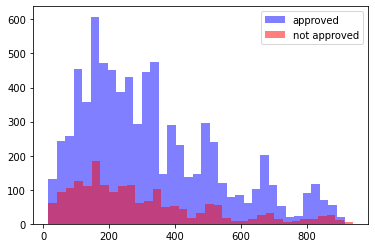

In [17]:
#1.1.4
app = []
napp = []
for _ ,i in data.iterrows():
    if i['credit.policy'] == 1:
        app.append(i['installment'])
    else:
        napp.append(i['installment'])
plt.hist(app, bins=35, color=[0,0,1], label='approved', alpha=0.5)
plt.hist(napp, bins=35, color=[1,0,0], label='not approved', alpha=0.5)
plt.legend()
plt.show()

<AxesSubplot:title={'center':'fico'}, xlabel='credit.policy'>

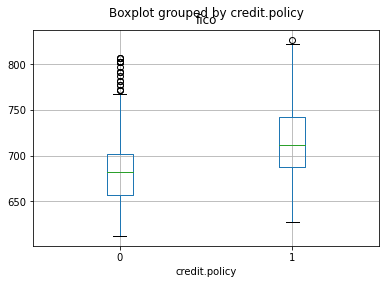

In [18]:
#1.1.5
data.boxplot(by="credit.policy",column='fico')

In [19]:
#1.2
Y = data['not.fully.paid']
X = data.drop('not.fully.paid', axis=1)
X = X.join(pd.get_dummies(data.purpose))
X = X.drop('purpose', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7,random_state=0)
ginicsfr = tree.DecisionTreeClassifier(criterion='gini',random_state=0)
ginicsfr.fit(X_train, Y_train)
infocsfr = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
infocsfr.fit(X_train, Y_train)
ginirforest = RandomForestClassifier(n_estimators=15,criterion='gini',max_samples=1000,random_state=0)
ginirforest.fit(X_train,Y_train)
inforforest = RandomForestClassifier(n_estimators=15,criterion='entropy',max_samples=1000,random_state=0)
inforforest.fit(X_train,Y_train)

print(cross_val_score(ginicsfr, X_train, Y_train, cv=10))

print(cross_val_score(infocsfr, X_train, Y_train, cv=10))

print(cross_val_score(ginirforest, X_train, Y_train, cv=10))

print(cross_val_score(inforforest, X_train, Y_train, cv=10))

[0.71982116 0.74366617 0.73770492 0.74925373 0.74179104 0.7119403  0.75223881 0.7358209  0.72985075 0.7358209 ]
[0.7466468  0.73174367 0.74068554 0.71791045 0.74029851 0.73283582 0.75671642 0.74626866 0.74626866 0.74328358]
[0.82861401 0.83606557 0.83755589 0.83432836 0.83731343 0.83134328 0.82835821 0.82835821 0.83134328 0.83134328]
[0.83755589 0.83159463 0.83010432 0.83283582 0.83880597 0.8358209  0.82089552 0.8358209  0.83731343 0.83134328]


In [20]:
#1.3
print(precision_recall_fscore_support(Y_test, ginicsfr.predict(X_test),average='binary',pos_label=0)[:3])

print(precision_recall_fscore_support(Y_test, infocsfr.predict(X_test),average='binary',pos_label=0)[:3])

print(precision_recall_fscore_support(Y_test, ginirforest.predict(X_test),average='binary',pos_label=0)[:3])

print(precision_recall_fscore_support(Y_test, inforforest.predict(X_test),average='binary',pos_label=0)[:3])

(0.8554621848739495, 0.8375154257507199, 0.8463936811473707)
(0.8554671135316296, 0.8399835458658989, 0.8476546284765463)
(0.8491364117025026, 0.9909502262443439, 0.9145785876993167)
(0.8490299823633157, 0.9901275195392842, 0.9141663501709076)


In [21]:
"""
Based on the outputs of precision_recall_fscore_support, we can see that precision for the 
decision trees and random forests are about equal, recall for the random forests are 
significantly higher than the recall for decision trees, and therefore, the fscore is higher 
for the random forests.
In the case of a bank using this model, they would likely prefer to have a higher precision, 
as the bank would not want to turn away customers for being loan defaulters when they are not. 
That is losing potential business for the bank. Unfortunately, both models have about the same
precision, so as the bank, I would just go with random forests since it has the higher f-score.
"""

'\nBased on the outputs of precision_recall_fscore_support, we can see that precision for the \ndecision trees and random forests are about equal, recall for the random forests are \nsignificantly higher than the recall for decision trees, and therefore, the fscore is higher \nfor the random forests.\nIn the case of a bank using this model, they would likely prefer to have a higher precision, \nas the bank would not want to turn away customers for being loan defaulters when they are not. \nThat is losing potential business for the bank. Unfortunately, both models have about the same\nprecision, so as the bank, I would just go with random forests since it has the higher f-score.\n'